# crime in boston

어떤 범죄가 많이 발생하고

어떤 시간이 가장 위험한지

총기 범죄의 비율

범죄의 종류

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('./datasets/crime.csv', encoding='cp949')
df.shape

(319073, 17)

In [23]:
df.head(2)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"


In [24]:
df.isna().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318054
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19999
Long                    19999
Location                    0
dtype: int64

In [25]:
## shotting의 nan 갯수가 너무 많아서, 데이터 확인
df['SHOOTING'].unique()

array([nan, 'Y'], dtype=object)

In [26]:
# nan를 N으로 변환하고, 확인
df['SHOOTING'] = df['SHOOTING'].fillna('N')
df['SHOOTING'].unique()

array(['N', 'Y'], dtype=object)

In [27]:
df = df.dropna()
df.isna().sum()

INCIDENT_NUMBER        0
OFFENSE_CODE           0
OFFENSE_CODE_GROUP     0
OFFENSE_DESCRIPTION    0
DISTRICT               0
REPORTING_AREA         0
SHOOTING               0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
UCR_PART               0
STREET                 0
Lat                    0
Long                   0
Location               0
dtype: int64

In [28]:
crime = df[['OFFENSE_CODE_GROUP', 'SHOOTING', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'STREET']]
crime

,OFFENSE_CODE_GROUP,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET
0,Larceny,N,2018,9,Sunday,13,LINCOLN ST
1,Vandalism,N,2018,8,Tuesday,0,HECLA ST
2,Towed,N,2018,9,Monday,19,CAZENOVE ST
3,Investigate Property,N,2018,9,Monday,21,NEWCOMB ST
4,Investigate Property,N,2018,9,Monday,21,DELHI ST
5,Motor Vehicle Accident Response,N,2018,9,Monday,21,TALBOT AVE
6,Auto Theft,N,2018,9,Monday,21,NORMANDY ST
7,Verbal Disputes,N,2018,9,Monday,20,LAWN ST
8,Robbery,N,2018,9,Monday,20,MASSACHUSETTS AVE
9,Verbal Disputes,N,2018,9,Monday,20,LESLIE ST


In [29]:
crime.columns = ['CODE', 'SHOOTING', 'YEAR', 'MONTH', 'WEEK', 'HOUR', 'STREET']

In [30]:
crime.head()

,CODE,SHOOTING,YEAR,MONTH,WEEK,HOUR,STREET
0,Larceny,N,2018,9,Sunday,13,LINCOLN ST
1,Vandalism,N,2018,8,Tuesday,0,HECLA ST
2,Towed,N,2018,9,Monday,19,CAZENOVE ST
3,Investigate Property,N,2018,9,Monday,21,NEWCOMB ST
4,Investigate Property,N,2018,9,Monday,21,DELHI ST


In [36]:
crime['CODE'].unique()

array(['Larceny', 'Vandalism', 'Towed', 'Investigate Property',
       'Motor Vehicle Accident Response', 'Auto Theft', 'Verbal Disputes',
       'Robbery', 'Fire Related Reports', 'Other', 'Property Lost',
       'Assembly or Gathering Violations', 'Larceny From Motor Vehicle',
       'Medical Assistance', 'Residential Burglary', 'Simple Assault',
       'Restraining Order Violations', 'Violations', 'Harassment',
       'Ballistics', 'Property Found', 'Police Service Incidents',
       'Disorderly Conduct', 'Property Related Damage',
       'Missing Person Reported', 'Investigate Person', 'Fraud',
       'Drug Violation', 'Aggravated Assault',
       'License Plate Related Incidents', 'Firearm Violations',
       'Other Burglary', 'Arson', 'Warrant Arrests', 'Bomb Hoax',
       'Counterfeiting', 'Liquor Violation', 'Firearm Discovery',
       'Landlord/Tenant Disputes', 'Missing Person Located',
       'Auto Theft Recovery', 'Service', 'Operating Under the Influence',
       'Confiden

시간대별 위험정도

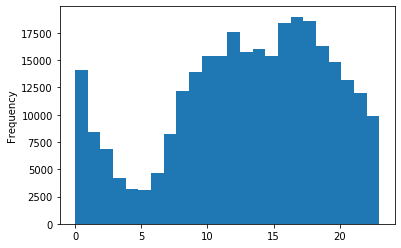

In [43]:
crime.HOUR.plot.hist(bins=24)

총기 범죄 비율, 범죄 종류

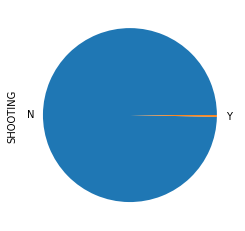

In [45]:
crime.SHOOTING.value_counts().plot.pie()

In [48]:
# 총기로 발생하는 범죄의 종류는? 조건부 검색, 데이터[조건]
cond = crime.SHOOTING == 'Y'
crime_shooting = crime[cond]

In [50]:
crime_shooting.CODE.value_counts()

Aggravated Assault                 502
Homicide                           113
Warrant Arrests                     69
Firearm Violations                  69
Ballistics                          40
Search Warrants                     29
Drug Violation                      28
Medical Assistance                  20
Robbery                             18
Vandalism                           17
Other                               14
Investigate Property                13
Motor Vehicle Accident Response      6
Investigate Person                   6
Simple Assault                       5
Towed                                3
Property Found                       3
Disorderly Conduct                   3
Firearm Discovery                    3
Property Lost                        2
Recovered Stolen Property            2
Violations                           2
Property Related Damage              1
Manslaughter                         1
Police Service Incidents             1
Missing Person Located   

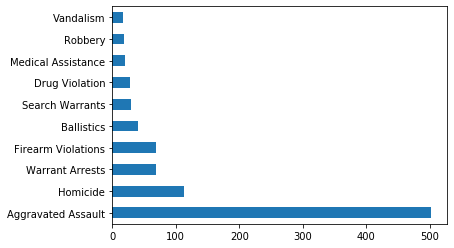

In [55]:
crime_shooting.CODE.value_counts().head(10).plot.barh()

In [57]:
data = df.dropna()

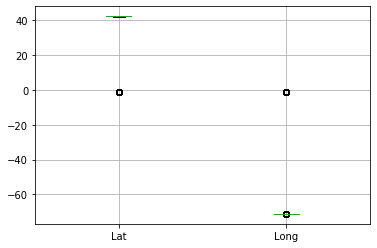

In [60]:
data[['Lat', 'Long']].boxplot()

In [66]:
# 위도 경도 모두 절대값이 20인것만 산점도를 그리기
cond1 = abs(data['Lat']) > 20
cond2 = abs(data['Long']) > 20
cond = np.logical_and(cond1, cond2)
cond1.mean(), cond2.mean(), cond.mean()

(0.9994874786308936, 0.9994874786308936, 0.9994874786308936)

In [67]:
data_valid = data[cond]

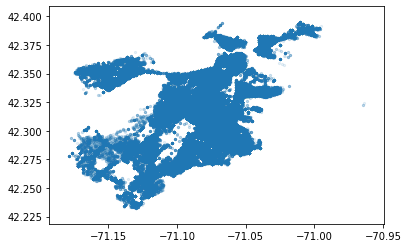

In [71]:
plt.scatter(data_valid['Long'], data_valid['Lat'], s=5, alpha=0.1)

In [72]:
data_valid.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,N,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,N,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,N,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,N,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,N,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [78]:
# 그룹별로 통계치 뽑기
data_valid[data_valid.DAY_OF_WEEK=='Sunday'].head()
data_valid.sort_values(by='DAY_OF_WEEK')
data_valid.groupby(by=['DAY_OF_WEEK', 'YEAR']).mean()

OFFENSE_CODE     MONTH       HOUR        Lat       Long
DAY_OF_WEEK YEAR                                                         
Friday      2015   2172.956974  9.136358  13.279865  42.324196 -71.082954
            2016   2277.942368  6.428212  13.300014  42.322580 -71.082865
            2017   2354.216152  6.593612  13.303355  42.322867 -71.083413
            2018   2340.287976  4.677871  13.357910  42.322752 -71.083238
Monday      2015   2196.929822  9.119503  13.226307  42.322426 -71.082681
            2016   2282.571735  6.551228  13.412656  42.321500 -71.083327
            2017   2345.281405  6.403965  13.305137  42.321644 -71.083089
            2018   2336.921127  4.630191  13.081023  42.321336 -71.082739
Saturday    2015   2194.575092  9.143808  12.424908  42.323832 -71.081915
            2016   2309.045465  6.525459  12.717610  42.322738 -71.082778
            2017   2335.914339  6.620312  12.876601  42.322250 -71.082699
            2018   2318.043550  4.691513  12.812067  42.322429 -71.082864
Sunday      2015   2178.692320  9.273528  12.159585  42.323674 -71.081973
            2016   2290.192857  6.485175  12.379219  42.322433 -71.082100
            2017   2317.937640  6.576480  12.577226  42.322751 -71.082084
            2018   2323.163813  4.783619  12.675163  42.322400 -71.082036
Thursday    2015   2181.914559  9.230355  13.273816  42.322977 -71.081791
            2016   2280.827972  6.611980  13.357658  42.322114 -71.082690
            2017   2359.016515  6.553802  13.281122  42.322366 -71.083498
            2018   2310.947380  4.708343  13.084439  42.321779 -71.083235
Tuesday     2015   2166.468639  9.181170  13.244949  42.322462 -71.083223
            2016   2288.642317  6.540154  13.518527  42.321436 -71.083534
            2017   2314.158123  6.562024  13.431774  42.321433 -71.082946
            2018   2363.713928  4.558716  13.291648  42.320767 -71.083484
Wednesday   2015   2171.286564  9.216742  13.346998  42.322476 -71.082144
            2016   2277.129336  6.600226  13.401056  42.322238 -71.082767
            2017   2330.574771  6.514077  13.253090  42.322263 -71.083253
            2018   2347.920413  4.601390  13.284385  42.321581 -71.083175

In [80]:
data_valid.groupby(by='DAY_OF_WEEK').aggregate(['min', 'max'])

INCIDENT_NUMBER             OFFENSE_CODE        \
                        min         max          min   max   
DAY_OF_WEEK                                                  
Friday        I090317057-00  I182070872          111  3831   
Monday            142052550  I182070941          111  3831   
Saturday      I060168073-00  I182070887          111  3831   
Sunday        I050310906-00  I182070945          111  3831   
Thursday      I030217815-08  I182070834          111  3831   
Tuesday       I010370257-00  I182070943          111  3831   
Wednesday     I080542626-00  I182070857          111  3831   

             OFFENSE_CODE_GROUP                   \
                            min              max   
DAY_OF_WEEK                                        
Friday       Aggravated Assault  Warrant Arrests   
Monday       Aggravated Assault  Warrant Arrests   
Saturday     Aggravated Assault  Warrant Arrests   
Sunday       Aggravated Assault  Warrant Arrests   
Thursday     Aggravated Assault  Warrant Arrests   
Tuesday      Aggravated Assault  Warrant Arrests   
Wednesday    Aggravated Assault  Warrant Arrests   

                                      OFFENSE_DESCRIPTION  \
                                                      min   
DAY_OF_WEEK                                                 
Friday                                             AFFRAY   
Monday                               ABDUCTION - INTICING   
Saturday     A&B HANDS, FEET, ETC.  - MED. ATTENTION REQ.   
Sunday                                             AFFRAY   
Thursday                            A&B ON POLICE OFFICER   
Tuesday                              ABDUCTION - INTICING   
Wednesday                           A&B ON POLICE OFFICER   

                                              DISTRICT      ... UCR_PART  \
                                          max      min max  ...      min   
DAY_OF_WEEK                                                 ...            
Friday       WEAPON - OTHER - OTHER VIOLATION       A1  E5  ...    Other   
Monday       WEAPON - OTHER - OTHER VIOLATION       A1  E5  ...    Other   
Saturday     WEAPON - OTHER - OTHER VIOLATION       A1  E5  ...    Other   
Sunday       WEAPON - OTHER - OTHER VIOLATION       A1  E5  ...    Other   
Thursday     WEAPON - OTHER - OTHER VIOLATION       A1  E5  ...    Other   
Tuesday      WEAPON - OTHER - OTHER VIOLATION       A1  E5  ...    Other   
Wednesday    WEAPON - OTHER - OTHER VIOLATION       A1  E5  ...    Other   

                            STREET                    Lat             \
                  max          min         max        min        max   
DAY_OF_WEEK                                                            
Friday       Part Two   ALBANY ST   ZEIGLER ST  42.232413  42.395042   
Monday       Part Two   ALBANY ST    ZELLER ST  42.232413  42.395042   
Saturday     Part Two   ALBANY ST   ZEIGLER ST  42.232413  42.395042   
Sunday       Part Two   ALBANY ST   ZEIGLER ST  42.232870  42.395042   
Thursday     Part Two   ALBANY ST    ZELLER ST  42.233086  42.395042   
Tuesday      Part Two   ALBANY ST   ZEIGLER ST  42.232413  42.395042   
Wednesday    Part Two   ALBANY ST   ZEIGLER ST  42.232413  42.395042   

                  Long                                Location  \
                   min        max                          min   
DAY_OF_WEEK                                                      
Friday      -71.178674 -70.995362  (42.23241330, -71.12971531)   
Monday      -71.178674 -70.996038  (42.23241330, -71.12971531)   
Saturday    -71.178674 -70.964365  (42.23241330, -71.12971531)   
Sunday      -71.176805 -70.996769  (42.23287025, -71.13004959)   
Thursday    -71.178674 -70.964365  (42.23308580, -71.12815697)   
Tuesday     -71.178674 -70.963676  (42.23241330, -71.12971531)   
Wednesday   -71.178674 -70.996038  (42.23241330, -71.12971531)   

                                          
                                     max  
DAY_OF_WEEK                   

In [81]:
data_valid.groupby(by=['MONTH', 'DAY_OF_WEEK']).aggregate(['min', 'max'])

INCIDENT_NUMBER             OFFENSE_CODE        \
                              min         max          min   max   
MONTH DAY_OF_WEEK                                                  
1     Friday        I110694557-00  I182061525          301  3831   
      Monday        I142033219-00  I182068912          111  3831   
      Saturday      I060168073-00  I182054748          111  3831   
      Sunday        I140110321-00  I182068927          111  3831   
      Thursday      I140160427-01  I182031033          111  3831   
      Tuesday       I130204032-00  I182063905          121  3831   
      Wednesday     I152021532-01  I182043841          111  3831   
2     Friday           I162009638  I182063875          112  3831   
      Monday        I142051855-00  I182060656          301  3831   
      Saturday         I162009885  I182067430          111  3831   
      Sunday           I162010118  I182063256          111  3831   
      Thursday      I142042232-00  I182068987          111  3831   
      Tuesday       I130194606-00  I182045852          301  3831   
      Wednesday        I152048466  I182064543          111  3831   
3     Friday           I152066989  I182067498          111  3831   
      Monday        I140311903-00  I182048143          111  3831   
      Saturday         I152086867  I182067825          111  3831   
      Sunday        I152010121-00  I182065461          111  3831   
      Thursday         I152098924  I182063310          301  3831   
      Tuesday          I152104363  I182051680          111  3831   
      Wednesday     I152019928-00  I182066843          301  3831   
4     Friday           I162005874  I182068727          111  3831   
      Monday           I152069051  I182065457          301  3831   
      Saturday      I142050207-00  I182059950          111  3831   
      Sunday        I140188130-00  I182067892          111  3831   
      Thursday         I162026740  I182065089          111  3831   
      Tuesday       I140041532-00  I182064452          111  3831   
      Wednesday     I120283195-00  I182060533          301  3831   
5     Friday           I162031565  I182064913          111  3831   
      Monday           I162024859  I182065104          301  3831   
...                           ...         ...          ...   ...   
8     Tuesday       I142014620-00  I182070943          111  3831   
      Wednesday     I080542626-00  I182070857          111  3831   
9     Friday        I120470733-00  I182068383          111  3831   
      Monday        I120260724-01  I182070941          301  3831   
      Saturday         I152073709  I182070887          111  3831   
      Sunday           I152073928  I182070945          111  3831   
      Thursday      I142013220-00  I182055984          111  3831   
      Tuesday          I152052905  I182060757          111  3831   
      Wednesday     I152006153-00  I182013548          111  3831   
10    Friday        I110177502-00  I182043779          121  3831   
      Monday        I120069826-00  I182064766          301  3831   
      Saturday      I142016089-00  I182056896          111  3831   
      Sunday           I152078936  I182054767          111  3831   
      Thursday         I152081507  I182047902          111  3831   
      Tuesday       I152033383-00  I182036908          111  3831   
      Wednesday     I142020701-00  I182070115          111  3831   
11    Friday        I090317057-00  I182068812          111  3831   
      Monday           I152058857  I182041289          111  3831   
      Saturday      I130452692-00  I182012435          111  3831   
      Sunday           I152080455  I182023441          111  3831   
      Thursday      I152024515-00  I182045998          111  3831   
      Tuesday          I152072372  I182057388          111  3831   
      Wednesday     I142045856-00  I182070304          301  3831   
12    Friday        I142033071-00  I182069334          111  3831   
      Monday        I130041200-00  I182044061          111  3831   
      